Time taken: 0.0012099742889404297 seconds


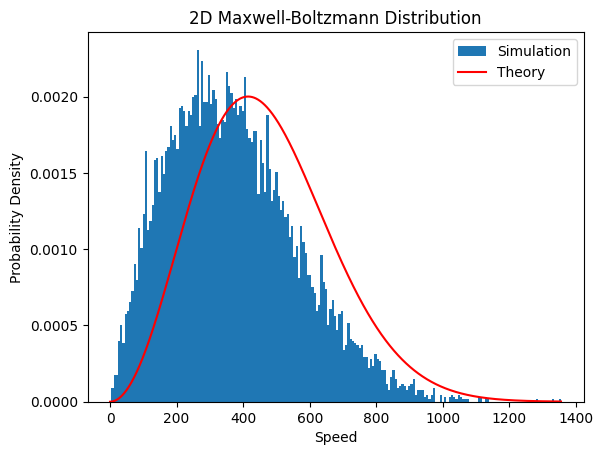

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

def maxwell_boltzmann_2d(N, T, m):
    k = 1.38e-23  # 볼츠만 상수

    # 속도의 평균과 표준편차를 계산
    mu = 0
    sigma = np.sqrt(k * T / m)

    start_time = time.time()

    # 정규분포를 사용해 x 및 y 속도를 생성
    v_x = np.random.normal(mu, sigma, N)
    v_y = np.random.normal(mu, sigma, N)

    end_time = time.time()

    # 시간 체크
    print(f"Time taken: {end_time - start_time} seconds")

    return v_x, v_y

def maxwell_boltzmann_pdf(v, T, m):
    k = 1.38e-23  # 볼츠만 상수

    # 이론적인 확률 밀도 함수 계산
    coeff = (m / (2 * np.pi * k * T)) ** (3 / 2)
    exp = np.exp(-m * v**2 / (2 * k * T))
    pdf = 4 * np.pi * v**2 * coeff * exp

    return pdf

N = 10000  # 입자 수
T = 300    # 온도 (Kelvin)
m = 28.97e-3 / 6.022e23  # 질량 (Nitrogen molecule)

v_x, v_y = maxwell_boltzmann_2d(N, T, m)

# 이론적인 확률 밀도 함수 계산
speed = np.sqrt(v_x**2 + v_y**2)
v_range = np.linspace(0, np.max(speed), 1000)
pdf_theory = maxwell_boltzmann_pdf(v_range, T, m)

# 분포 플로팅
plt.hist(speed, bins=200, density=True, label='Simulation')
plt.plot(v_range, pdf_theory, 'r-', label='Theory')
plt.title('2D Maxwell-Boltzmann Distribution')
plt.xlabel('Speed')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time

class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
        else:
            curr_node = self.head
            while curr_node.next:
                curr_node = curr_node.next
            curr_node.next = new_node

def maxwell_boltzmann_2d_linked_list(N, T, m):
    k = 1.38e-23  # 볼츠만 상수

    # 속도의 평균과 표준편차를 계산
    mu = 0
    sigma = np.sqrt(k * T / m)

    # 연결 리스트 생성 및 속도 할당
    linked_list = LinkedList()
    for _ in range(N):
        v_x = np.random.normal(mu, sigma)
        v_y = np.random.normal(mu, sigma)
        linked_list.append((v_x, v_y))

    return linked_list

N = 100  # 입자 수
T = 300    # 온도 (Kelvin)
m = 28.97e-3 / 6.022e23  # 질량 (Nitrogen molecule)

start_time = time.time()
linked_list = maxwell_boltzmann_2d_linked_list(N, T, m)
end_time = time.time()

# 시간 체크
print(f"Time taken (Linked List): {end_time - start_time} seconds")

Time taken (Linked List): 0.0031366348266601562 seconds


In [20]:
class CellList:
    def __init__(self, num_cells, cell_size):
        self.num_cells = num_cells
        self.cell_size = cell_size
        self.cells = [[LinkedList() for _ in range(num_cells)] for _ in range(num_cells)]

    def add_particle(self, particle, cell_x, cell_y):
        self.cells[cell_x][cell_y].append(particle)

def maxwell_boltzmann_2d_cell_list(N, T, m):
    k = 1.38e-23  # 볼츠만 상수

    # 속도의 평균과 표준편차를 계산
    mu = 0
    sigma = np.sqrt(k * T / m)

    # cell list 생성 및 속도 할당
    num_cells = int(np.sqrt(N))
    cell_size = 1.0 / num_cells
    cell_list = CellList(num_cells, cell_size)

    for _ in range(N):
        v_x = np.random.normal(mu, sigma)
        v_y = np.random.normal(mu, sigma)
        particle = (v_x, v_y)
        cell_x = int(np.random.uniform(0, num_cells))
        cell_y = int(np.random.uniform(0, num_cells))
        cell_list.add_particle(particle, cell_x, cell_y)

    return cell_list

start_time = time.time()
cell_list = maxwell_boltzmann_2d_cell_list(N, T, m)
end_time = time.time()

# 시간 체크
print(f"Time taken (Cell List): {end_time - start_time} seconds")

Time taken (Cell List): 0.0031905174255371094 seconds


In [21]:
def maxwell_boltzmann_2d_array(N, T, m):
    k = 1.38e-23  # 볼츠만 상수

    # 속도의 평균과 표준편차를 계산
    mu = 0
    sigma = np.sqrt(k * T / m)

    # 속도 배열 생성 및 할당
    velocities = np.zeros((N, 2))
    for i in range(N):
        velocities[i] = np.random.normal(mu, sigma, size=2)

    return velocities

start_time = time.time()
velocities = maxwell_boltzmann_2d_array(N, T, m)
end_time = time.time()

# 시간 체크
print(f"Time taken (Array): {end_time - start_time} seconds")

Time taken (Array): 0.0010371208190917969 seconds
